In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('winequality_red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

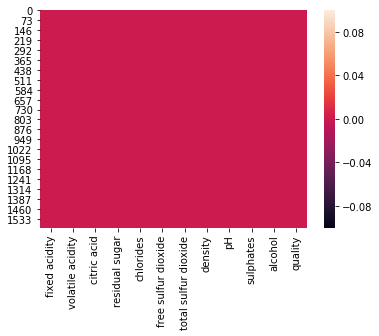

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

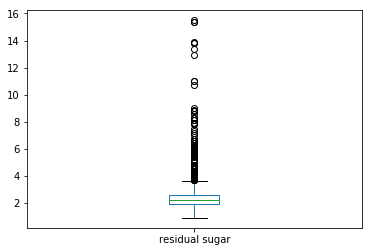

In [9]:
df['residual sugar'].plot.box()

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

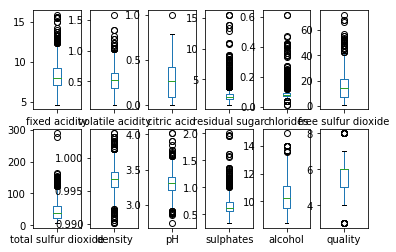

In [17]:
df.plot(kind='box',subplots=True,layout=(2,6))

In [18]:
from scipy.stats import zscore

In [19]:
z=np.abs(zscore(df))

In [20]:
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [21]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [22]:
z[13][9]

5.32210116796055

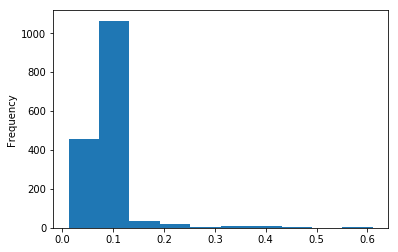

In [23]:
df['chlorides'].plot.hist()

# Removing SKEWNESS

In [25]:
from scipy.stats import boxcox

In [26]:
df['residual sugar']=boxcox(df['residual sugar'],0)

In [27]:
df['chlorides']=boxcox(df['chlorides'],0)

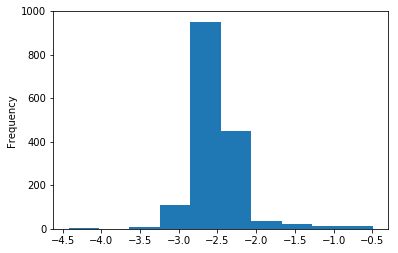

In [28]:
df['chlorides'].plot.hist()

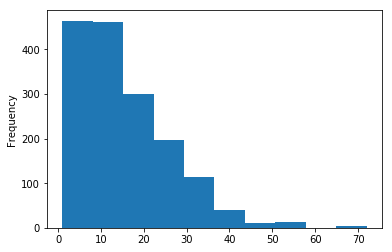

In [29]:
df['free sulfur dioxide'].plot.hist()

In [30]:
df['free sulfur dioxide']=boxcox(df['free sulfur dioxide'],0)
df['total sulfur dioxide']=boxcox(df['total sulfur dioxide'],0)
df['sulphates']=boxcox(df['sulphates'],0)

# Checking -ve Correlation for further dropping the column

In [31]:
cor_map=df.corr()

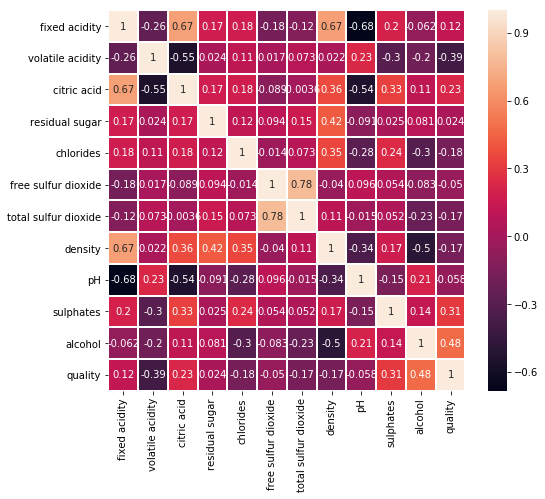

In [43]:
plt.figure(figsize=(8,7))
sns.heatmap(cor_map,annot=True,lw=1)
plt.show()

As there are no strong -ve correlation between features and wine quality,NO COLUMN is DROPPED

# Removing OUTLIERS

In [44]:
df_new=df[(z<3).all(axis=1)]

In [45]:
df_new.shape

(1451, 12)

In [46]:
df.shape

(1599, 12)

In [47]:
df=df_new

In [48]:
x=df.iloc[:,0:-1]

In [49]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8
4,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4


In [50]:
y=df.iloc[:,-1]

In [51]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [52]:
x.shape

(1451, 11)

In [53]:
y.shape

(1451,)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=42)

In [55]:
x_train.shape

(1044, 11)

In [56]:
x_test.shape

(407, 11)

In [57]:
y_train.shape

(1044,)

In [58]:
y_test.shape

(407,)

In [59]:
lm=LinearRegression()

In [60]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
lm.score(x_train,y_train)

0.3944676949317314

In [62]:
pred=lm.predict(x_test)

In [63]:
mean_squared_error(y_test,pred)

0.40921410980851053

In [64]:
mean_absolute_error(y_test,pred)

0.4967238925425289

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test,pred)

0.35152959786792604

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
mnb=MultinomialNB()
svc=SVC()
svc_l=SVC(kernel='linear')
svc_p=SVC(kernel='poly')

In [72]:
dt=DecisionTreeClassifier()
dt_e=DecisionTreeClassifier(criterion='entropy')

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
svc.fit(x_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
svc.score(x_train,y_train)

0.6168582375478927

In [80]:
svc_l.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [81]:
svc_l.score(x_train,y_train)

0.6216475095785441

In [82]:
svc_p.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [83]:
svc_p.score(x_train,y_train)

0.6704980842911877

In [84]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
dt.score(x_train,y_train)

1.0

In [86]:
dt_e.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
dt_e.score(x_train,y_train)

1.0

In [91]:
knn=KNeighborsClassifier()

In [93]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [94]:
knn.score(x_train,y_train)

0.7212643678160919

In [95]:
pred_k=knn.predict(x_test)

In [96]:
pred_svc=svc.predict(x_test)

In [97]:
pred_svc_l=svc_l.predict(x_test)

In [98]:
pred_svc_p=svc_p.predict(x_test)

In [99]:
pred_dt=dt.predict(x_test)

In [100]:
pred_dt_e=dt_e.predict(x_test)

In [102]:
print(accuracy_score(y_test,pred_k))

0.5503685503685504


In [103]:
print(accuracy_score(y_test,pred_svc))

0.5601965601965602


In [104]:
print(accuracy_score(y_test,pred_svc_l))

0.5651105651105651


In [105]:
print(accuracy_score(y_test,pred_svc_p))

0.5798525798525799


In [106]:
print(accuracy_score(y_test,pred_dt))

0.6093366093366094


In [109]:
print(accuracy_score(y_test,pred_dt_e))

0.5823095823095823


In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc=RandomForestClassifier()

In [131]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
pred_rfc=rfc.predict(x_test)

In [133]:
print(accuracy_score(y_test,pred_rfc))

0.6609336609336609


# Therefore Random Forest Tree algorithm is most suitable with 66% accuracy for our dataset

In [110]:
t=np.array([6.4,0.38,0.14,2.2,0.038,15.0,25.0,0.9951399999999999,3.44,0.65,11.1])

In [111]:
t.shape

(11,)

In [117]:
t=t.reshape(1,-1)

In [118]:
t.shape

(1, 11)

In [134]:
rfc.predict(t)

array([4], dtype=int64)

In [120]:
u=np.array([7.3,0.69,0.32,2.2,0.069,35.0,104.0,0.9963200000000001,3.33,0.51,9.5])

In [121]:
u=u.reshape(1,-1)

In [135]:
rfc.predict(u)

array([5], dtype=int64)

In [126]:
v=np.array([7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.9972799999999999,3.3,0.65,10.0])

In [127]:
v=v.reshape(1,-1)

In [136]:
rfc.predict(v)

array([5], dtype=int64)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.